## EZ Coin Crypto Data Prep

In [34]:
# Import libraries and dependencies
import ccxt
import os
import pandas as pd
from dotenv import load_dotenv
import talib
from matplotlib import pyplot as plt
from pathlib import Path

import numpy as np
import time
import datetime

In [35]:
#Google Colab install commands
#!pip install ccxt
#!pip install python-dotenv
#!pip install jupyter-dash

# url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
# !wget $url/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
# !wget $url/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
# !dpkg -i libta.deb ta.deb
# !pip install ta-lib


In [7]:
#Training Start: 12/1/2020
#Training Start: 02/17/2021
#Training Start: 02/18/2021
#Training Start: 03/22/2021

In [8]:
#@title Cryptocurrency Selector
# user input for cyrpto coin
# user input for period

select_crypto = 'ETH' #@param ["BTC", "ETH", "XRP","ADA", "DOT", "CRO"]
select_period = '1d' #@param ["1m", "5m", "30m","1h", "1d", "1w"]

print(select_crypto)
print(select_period)


ETH
1d


In [9]:
# Load environment variables
load_dotenv()
curr = '/USD'
symbol = select_crypto  + curr
period = select_period
limit = 150

# Import environment variables
kraken_public_key = os.getenv("KRAKEN_PUBLIC_KEY")
kraken_secret_key = os.getenv("KRAKEN_SECRET_KEY")
kraken = ccxt.kraken({"apiKey": kraken_public_key, "secret": kraken_secret_key})

# Verify that environment variables were loaded
print(f"Kraken key data type: {type(kraken_public_key)}")
print(f"Kraken secren data type: {type(kraken_secret_key)}")

Kraken key data type: <class 'str'>
Kraken secren data type: <class 'str'>


In [10]:
# function to pull crypto data
def fetch_crypto_data(crypto, interval, limit):
    interval_in_min = {'1m':1,'5m':5, '30m':30, '1h':60, '1d':1440, '1w':10080}
    no_of_data = limit * interval_in_min[interval]
    print(no_of_data)
    past_datetime = (datetime.datetime.now() + datetime.timedelta(minutes=240-no_of_data)).strftime('%Y-%m-%d %H:%M:%S')
    data = kraken.fetch_ohlcv(crypto, interval, kraken.parse8601(past_datetime))
    time.sleep(1)
    return data

In [11]:
data = fetch_crypto_data(symbol, period, limit)
df_kraken = pd.DataFrame(data, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
#df_kraken['date'] = pd.to_datetime(df_kraken['date'],unit='ms')

# Set index as datetime object and drop extraneous columns
df_kraken.set_index(pd.to_datetime(df_kraken['Date'], unit='ms', infer_datetime_format=True), inplace=True)
df_kraken.drop(columns=['Date'], inplace=True)


216000


In [13]:
df_kraken

Open     High      Low    Close         Volume
Date                                                         
2020-10-25   412.41   417.84   403.25   406.35   27190.693068
2020-10-26   406.22   411.31   382.80   393.48   73020.457930
2020-10-27   393.48   410.48   390.52   403.65   39937.762229
2020-10-28   403.55   409.18   381.10   388.63   53447.351942
2020-10-29   388.91   394.11   380.69   387.67   53507.559151
2020-10-30   387.39   392.00   373.52   382.83   58405.634138
2020-10-31   383.07   393.76   380.77   386.81   26877.050217
2020-11-01   386.62   397.47   385.07   396.80   25999.382771
2020-11-02   396.80   404.56   378.16   383.78   79339.279784
2020-11-03   383.43   390.41   371.00   388.01   50087.133377
2020-11-04   388.00   408.70   377.01   402.68   81685.228242
2020-11-05   402.88   421.64   396.50   417.04   93752.260267
2020-11-06   417.04   458.70   415.52   456.43  131858.296671
2020-11-07   456.58   468.83   425.00   435.81  128871.460187
2020-11-08   435.67   460.89   432.67   454.60   55142.278842
2020-11-09   454.47   459.63   434.63   444.33   88681.718452
2020-11-10   444.69   455.16   439.00   451.35   56256.840525
2020-11-11   451.59   476.57   450.02   464.39   80321.707565
2020-11-12   463.69   470.00   451.10   462.86   66834.944276
2020-11-13   463.11   478.48   458.00   477.06   75582.037939
2020-11-14   477.26   477.98   451.95   461.18   45791.825793
2020-11-15   461.38   463.14   440.44   448.49   46902.428865
2020-11-16   448.22   466.00   445.95   460.30   52599.716938
2020-11-17   460.73   484.90   460.29   482.89   90310.069645
2020-11-18   482.79   495.40   454.56   479.11  141538.266273
2020-11-19   479.26   481.99   465.20   471.97   48357.176134
2020-11-20   472.05   514.77   471.50   510.38  108562.062456
2020-11-21   510.37   553.50   502.72   552.55  102160.708233
2020-11-22   552.57   581.82   512.00   561.48  130655.991165
2020-11-23   560.88   611.58   550.62   609.09  152818.240889
...             ...      ...      ...      ...            ...
2021-02-22  1935.44  1937.67   700.00  1778.82  232472.071048
2021-02-23  1778.93  1782.81  1358.00  1579.16  311472.082420
2021-02-24  1579.00  1716.00  1498.44  1625.01  157749.782482
2021-02-25  1625.55  1671.90  1458.76  1481.68  103915.865993
2021-02-26  1480.82  1563.16  1401.00  1445.33  137274.392317
2021-02-27  1445.23  1526.98  1426.52  1460.13   89749.061681
2021-02-28  1460.00  1469.27  1295.00  1422.70  173849.726075
2021-03-01  1422.47  1573.83  1414.00  1570.99  104778.769644
2021-03-02  1571.00  1616.17  1455.80  1489.22  127169.204963
2021-03-03  1488.56  1656.30  1478.04  1566.41   99872.152123
2021-03-04  1567.90  1624.68  1505.69  1537.52   90708.829044
2021-03-05  1539.76  1549.42  1442.86  1528.76  109879.003457
2021-03-06  1529.07  1671.10  1513.53  1650.56   72729.445954
2021-03-07  1651.08  1734.78  1631.19  1727.49   64850.560202
2021-03-08  1726.83  1842.92  1650.00  1833.68   94445.584769
2021-03-09  1834.19  1872.34  1796.34  1872.34   72160.271797
2021-03-10  1872.33  1879.37  1758.12  1795.79   82155.323534
2021-03-11  1795.44  1847.73  1724.65  1826.87   71185.384072
2021-03-12  1826.92  1840.64  1722.02  1767.06   60538.007946
2021-03-13  1767.77  1942.71  1727.70  1920.17   85219.275813
2021-03-14  1920.98  1930.85  1838.25  1847.80   56996.943117
2021-03-15  1847.80  1890.99  1735.72  1793.23   72686.990028
2021-03-16  1794.11  1818.00  1712.03  1805.14   49192.414910
2021-03-17  1805.69  1839.54  1743.01  1823.76   47484.969516
2021-03-18  1824.40  1849.00  1759.79  1776.57   44571.048795
2021-03-19  1776.57  1839.98  1731.40  1810.38   39611.810869
2021-03-20  1810.38  1868.48  1801.38  1805.00   33257.714002
2021-03-21  1804.11  1816.48  1747.95  1784.29   33175.768444
2021-03-22  1784.42  1807.97  1657.26  1681.63   62468.517223
2021-03-23  1681.21  1713.00  1652.00  1681.30   16738.320899

[150 rows x 5 columns]

In [14]:
# Drop NAs and calculate daily percent return
df_kraken['daily_return'] = df_kraken['Close'].dropna().pct_change()
df_kraken

Open     High      Low    Close         Volume  daily_return
Date                                                                       
2020-10-25   412.41   417.84   403.25   406.35   27190.693068           NaN
2020-10-26   406.22   411.31   382.80   393.48   73020.457930     -0.031672
2020-10-27   393.48   410.48   390.52   403.65   39937.762229      0.025846
2020-10-28   403.55   409.18   381.10   388.63   53447.351942     -0.037210
2020-10-29   388.91   394.11   380.69   387.67   53507.559151     -0.002470
2020-10-30   387.39   392.00   373.52   382.83   58405.634138     -0.012485
2020-10-31   383.07   393.76   380.77   386.81   26877.050217      0.010396
2020-11-01   386.62   397.47   385.07   396.80   25999.382771      0.025827
2020-11-02   396.80   404.56   378.16   383.78   79339.279784     -0.032813
2020-11-03   383.43   390.41   371.00   388.01   50087.133377      0.011022
2020-11-04   388.00   408.70   377.01   402.68   81685.228242      0.037808
2020-11-05   402.88   421.64   396.50   417.04   93752.260267      0.035661
2020-11-06   417.04   458.70   415.52   456.43  131858.296671      0.094451
2020-11-07   456.58   468.83   425.00   435.81  128871.460187     -0.045177
2020-11-08   435.67   460.89   432.67   454.60   55142.278842      0.043115
2020-11-09   454.47   459.63   434.63   444.33   88681.718452     -0.022591
2020-11-10   444.69   455.16   439.00   451.35   56256.840525      0.015799
2020-11-11   451.59   476.57   450.02   464.39   80321.707565      0.028891
2020-11-12   463.69   470.00   451.10   462.86   66834.944276     -0.003295
2020-11-13   463.11   478.48   458.00   477.06   75582.037939      0.030679
2020-11-14   477.26   477.98   451.95   461.18   45791.825793     -0.033287
2020-11-15   461.38   463.14   440.44   448.49   46902.428865     -0.027516
2020-11-16   448.22   466.00   445.95   460.30   52599.716938      0.026333
2020-11-17   460.73   484.90   460.29   482.89   90310.069645      0.049077
2020-11-18   482.79   495.40   454.56   479.11  141538.266273     -0.007828
2020-11-19   479.26   481.99   465.20   471.97   48357.176134     -0.014903
2020-11-20   472.05   514.77   471.50   510.38  108562.062456      0.081382
2020-11-21   510.37   553.50   502.72   552.55  102160.708233      0.082625
2020-11-22   552.57   581.82   512.00   561.48  130655.991165      0.016161
2020-11-23   560.88   611.58   550.62   609.09  152818.240889      0.084794
...             ...      ...      ...      ...            ...           ...
2021-02-22  1935.44  1937.67   700.00  1778.82  232472.071048     -0.080922
2021-02-23  1778.93  1782.81  1358.00  1579.16  311472.082420     -0.112243
2021-02-24  1579.00  1716.00  1498.44  1625.01  157749.782482      0.029034
2021-02-25  1625.55  1671.90  1458.76  1481.68  103915.865993     -0.088203
2021-02-26  1480.82  1563.16  1401.00  1445.33  137274.392317     -0.024533
2021-02-27  1445.23  1526.98  1426.52  1460.13   89749.061681      0.010240
2021-02-28  1460.00  1469.27  1295.00  1422.70  173849.726075     -0.025635
2021-03-01  1422.47  1573.83  1414.00  1570.99  104778.769644      0.104231
2021-03-02  1571.00  1616.17  1455.80  1489.22  127169.204963     -0.052050
2021-03-03  1488.56  1656.30  1478.04  1566.41   99872.152123      0.051833
2021-03-04  1567.90  1624.68  1505.69  1537.52   90708.829044     -0.018443
2021-03-05  1539.76  1549.42  1442.86  1528.76  109879.003457     -0.005697
2021-03-06  1529.07  1671.10  1513.53  1650.56   72729.445954      0.079672
2021-03-07  1651.08  1734.78  1631.19  1727.49   64850.560202      0.046608
2021-03-08  1726.83  1842.92  1650.00  1833.68   94445.584769      0.061471
2021-03-09  1834.19  1872.34  1796.34  1872.34   72160.271797      0.021083
2021-03-10  1872.33  1879.37  1758.12  1795.79   82155.323534     -0.040885
2021-03-11  1795.44  1847.73  1724.65  1826.87   71185.384072      0.017307
2021-03-12  1826.92  1840.64  1722.02  1767.06   60538.007946     -0.032739
2021-03-13  1767.77  1942.71  1727.70  1920.17   85219.275813  

In [15]:
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
df_kraken['fast_close'] = df_kraken['Close'].ewm(halflife=short_window).mean()
df_kraken['slow_close'] = df_kraken['Close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
df_kraken['crossover_long'] = np.where(df_kraken['fast_close'] > df_kraken['slow_close'], 1.0, 0.0)
df_kraken['crossover_short'] = np.where(df_kraken['fast_close'] < df_kraken['slow_close'], -1.0, 0.0)
df_kraken['crossover_signal'] = df_kraken['crossover_long'] + df_kraken['crossover_short']

df_kraken.head()

Open    High     Low   Close        Volume  daily_return  \
Date                                                                     
2020-10-25  412.41  417.84  403.25  406.35  27190.693068           NaN   
2020-10-26  406.22  411.31  382.80  393.48  73020.457930     -0.031672   
2020-10-27  393.48  410.48  390.52  403.65  39937.762229      0.025846   
2020-10-28  403.55  409.18  381.10  388.63  53447.351942     -0.037210   
2020-10-29  388.91  394.11  380.69  387.67  53507.559151     -0.002470   

            fast_close  slow_close  crossover_long  crossover_short  \
Date                                                                  
2020-10-25  406.350000  406.350000             0.0              0.0   
2020-10-26  397.770000  399.692069             0.0             -1.0   
2020-10-27  401.130000  401.103809             1.0              0.0   
2020-10-28  394.463333  397.654037             0.0             -1.0   
2020-10-29  390.957097  395.371290             0.0             -1.0   

            crossover_signal  
Date                          
2020-10-25               0.0  
2020-10-26              -1.0  
2020-10-27               1.0  
2020-10-28              -1.0  
2020-10-29              -1.0

<AxesSubplot:xlabel='Date'>

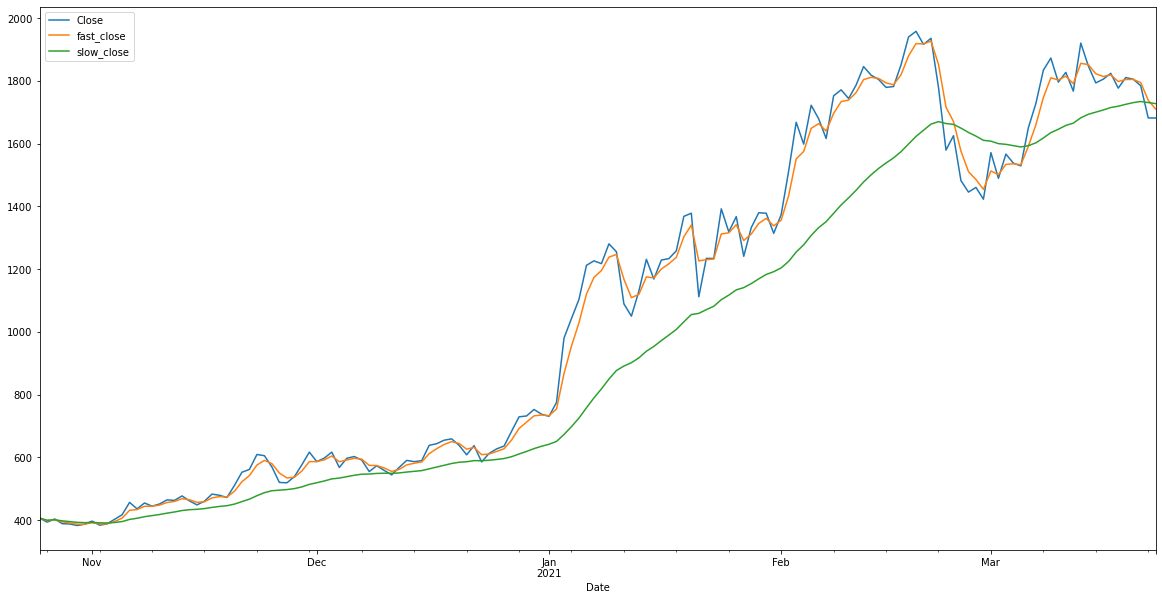

In [16]:
# Plot the EMA of ETH/USD closing prices
df_kraken[['Close', 'fast_close', 'slow_close']].plot(figsize=(20,10))

In [17]:
# Set short and long volatility windows
short_vol_window = 1
long_vol_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
df_kraken['fast_vol'] = df_kraken['daily_return'].ewm(halflife=short_vol_window).std()
df_kraken['slow_vol'] = df_kraken['daily_return'].ewm(halflife=long_vol_window).std()

# Construct a crossover trading signal
df_kraken['vol_trend_long'] = np.where(df_kraken['fast_vol'] < df_kraken['slow_vol'], 1.0, 0.0)
df_kraken['vol_trend_short'] = np.where(df_kraken['fast_vol'] > df_kraken['slow_vol'], -1.0, 0.0) 
df_kraken['vol_trend_signal'] = df_kraken['vol_trend_long'] + df_kraken['vol_trend_short']

df_kraken

Open     High      Low    Close         Volume  daily_return  \
Date                                                                          
2020-10-25   412.41   417.84   403.25   406.35   27190.693068           NaN   
2020-10-26   406.22   411.31   382.80   393.48   73020.457930     -0.031672   
2020-10-27   393.48   410.48   390.52   403.65   39937.762229      0.025846   
2020-10-28   403.55   409.18   381.10   388.63   53447.351942     -0.037210   
2020-10-29   388.91   394.11   380.69   387.67   53507.559151     -0.002470   
2020-10-30   387.39   392.00   373.52   382.83   58405.634138     -0.012485   
2020-10-31   383.07   393.76   380.77   386.81   26877.050217      0.010396   
2020-11-01   386.62   397.47   385.07   396.80   25999.382771      0.025827   
2020-11-02   396.80   404.56   378.16   383.78   79339.279784     -0.032813   
2020-11-03   383.43   390.41   371.00   388.01   50087.133377      0.011022   
2020-11-04   388.00   408.70   377.01   402.68   81685.228242      0.037808   
2020-11-05   402.88   421.64   396.50   417.04   93752.260267      0.035661   
2020-11-06   417.04   458.70   415.52   456.43  131858.296671      0.094451   
2020-11-07   456.58   468.83   425.00   435.81  128871.460187     -0.045177   
2020-11-08   435.67   460.89   432.67   454.60   55142.278842      0.043115   
2020-11-09   454.47   459.63   434.63   444.33   88681.718452     -0.022591   
2020-11-10   444.69   455.16   439.00   451.35   56256.840525      0.015799   
2020-11-11   451.59   476.57   450.02   464.39   80321.707565      0.028891   
2020-11-12   463.69   470.00   451.10   462.86   66834.944276     -0.003295   
2020-11-13   463.11   478.48   458.00   477.06   75582.037939      0.030679   
2020-11-14   477.26   477.98   451.95   461.18   45791.825793     -0.033287   
2020-11-15   461.38   463.14   440.44   448.49   46902.428865     -0.027516   
2020-11-16   448.22   466.00   445.95   460.30   52599.716938      0.026333   
2020-11-17   460.73   484.90   460.29   482.89   90310.069645      0.049077   
2020-11-18   482.79   495.40   454.56   479.11  141538.266273     -0.007828   
2020-11-19   479.26   481.99   465.20   471.97   48357.176134     -0.014903   
2020-11-20   472.05   514.77   471.50   510.38  108562.062456      0.081382   
2020-11-21   510.37   553.50   502.72   552.55  102160.708233      0.082625   
2020-11-22   552.57   581.82   512.00   561.48  130655.991165      0.016161   
2020-11-23   560.88   611.58   550.62   609.09  152818.240889      0.084794   
...             ...      ...      ...      ...            ...           ...   
2021-02-22  1935.44  1937.67   700.00  1778.82  232472.071048     -0.080922   
2021-02-23  1778.93  1782.81  1358.00  1579.16  311472.082420     -0.112243   
2021-02-24  1579.00  1716.00  1498.44  1625.01  157749.782482      0.029034   
2021-02-25  1625.55  1671.90  1458.76  1481.68  103915.865993     -0.088203   
2021-02-26  1480.82  1563.16  1401.00  1445.33  137274.392317     -0.024533   
2021-02-27  1445.23  1526.98  1426.52  1460.13   89749.061681      0.010240   
2021-02-28  1460.00  1469.27  1295.00  1422.70  173849.726075     -0.025635   
2021-03-01  1422.47  1573.83  1414.00  1570.99  104778.769644      0.104231   
2021-03-02  1571.00  1616.17  1455.80  1489.22  127169.204963     -0.052050   
2021-03-03  1488.56  1656.30  1478.04  1566.41   99872.152123      0.051833   
2021-03-04  1567.90  1624.68  1505.69  1537.52   90708.829044     -0.018443   
2021-03-05  1539.76  1549.42  1442.86  1528.76  109879.003457     -0.005697   
2021-03-06  1529.07  1671.10  1513.53  1650.56   72729.445954      0.079672   
2021-03-07  1651.08  1734.78  1631.19  1727.49   64850.560202      0.046608   
2021-03-08  1726.83  1842.92  1650.00  1833.68   94445.584769      0.061471   
2021-03-09  1834.19  1872.34  1796.34  1872.34   72160.271797      0.021083   
2021-03-10  1872.33  1879.37  1758.12  1795.79   82155.323534     -0.040885   
2021-03-11  1795.44  1847.73  1724.65  1826.87   71185.384072    

<AxesSubplot:xlabel='Date'>

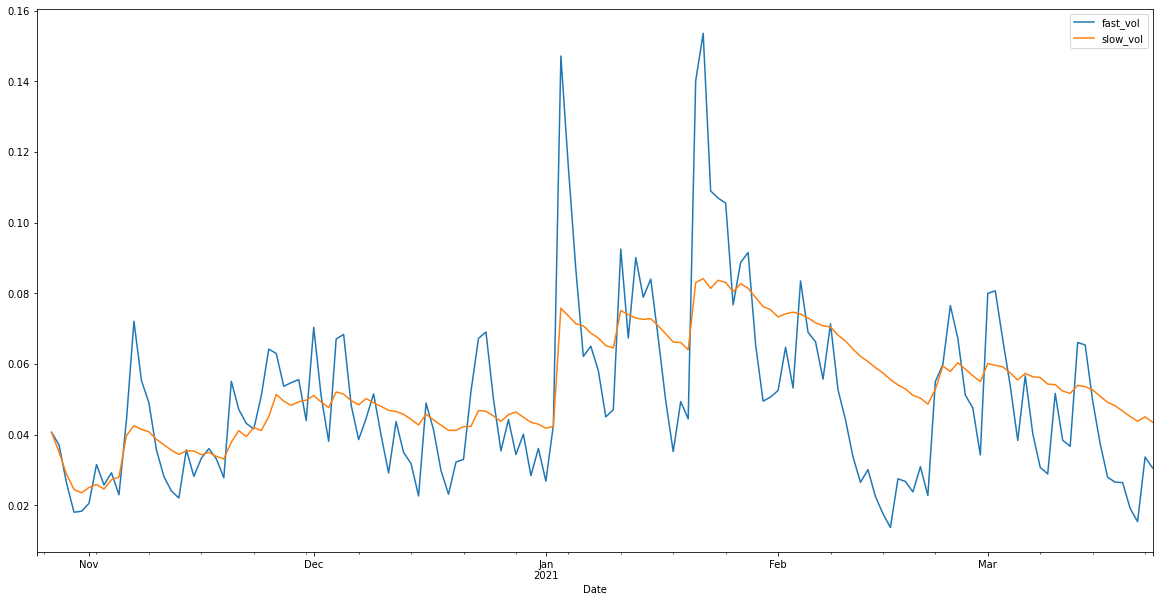

In [18]:
# Plot the EMA of BTC/USD daily return volatility
df_kraken[['fast_vol', 'slow_vol']].plot(figsize=(20,10))

In [19]:
# Set bollinger band window
bollinger_window = 10

# Calculate rolling mean and standard deviation
df_kraken['bollinger_mid_band'] = df_kraken['Close'].rolling(window=bollinger_window).mean()
df_kraken['bollinger_std'] = df_kraken['Close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
df_kraken['bollinger_upper_band']  = df_kraken['bollinger_mid_band'] + (df_kraken['bollinger_std'] * 1)
df_kraken['bollinger_lower_band']  = df_kraken['bollinger_mid_band'] - (df_kraken['bollinger_std'] * 1)

# Calculate bollinger band trading signal
df_kraken['bollinger_long'] = np.where(df_kraken['Close'] < df_kraken['bollinger_lower_band'], 1.0, 0.0)
df_kraken['bollinger_short'] = np.where(df_kraken['Close'] > df_kraken['bollinger_upper_band'], -1.0, 0.0)
df_kraken['bollinger_signal'] = df_kraken['bollinger_long'] + df_kraken['bollinger_short']

df_kraken

Open     High      Low    Close         Volume  daily_return  \
Date                                                                          
2020-10-25   412.41   417.84   403.25   406.35   27190.693068           NaN   
2020-10-26   406.22   411.31   382.80   393.48   73020.457930     -0.031672   
2020-10-27   393.48   410.48   390.52   403.65   39937.762229      0.025846   
2020-10-28   403.55   409.18   381.10   388.63   53447.351942     -0.037210   
2020-10-29   388.91   394.11   380.69   387.67   53507.559151     -0.002470   
2020-10-30   387.39   392.00   373.52   382.83   58405.634138     -0.012485   
2020-10-31   383.07   393.76   380.77   386.81   26877.050217      0.010396   
2020-11-01   386.62   397.47   385.07   396.80   25999.382771      0.025827   
2020-11-02   396.80   404.56   378.16   383.78   79339.279784     -0.032813   
2020-11-03   383.43   390.41   371.00   388.01   50087.133377      0.011022   
2020-11-04   388.00   408.70   377.01   402.68   81685.228242      0.037808   
2020-11-05   402.88   421.64   396.50   417.04   93752.260267      0.035661   
2020-11-06   417.04   458.70   415.52   456.43  131858.296671      0.094451   
2020-11-07   456.58   468.83   425.00   435.81  128871.460187     -0.045177   
2020-11-08   435.67   460.89   432.67   454.60   55142.278842      0.043115   
2020-11-09   454.47   459.63   434.63   444.33   88681.718452     -0.022591   
2020-11-10   444.69   455.16   439.00   451.35   56256.840525      0.015799   
2020-11-11   451.59   476.57   450.02   464.39   80321.707565      0.028891   
2020-11-12   463.69   470.00   451.10   462.86   66834.944276     -0.003295   
2020-11-13   463.11   478.48   458.00   477.06   75582.037939      0.030679   
2020-11-14   477.26   477.98   451.95   461.18   45791.825793     -0.033287   
2020-11-15   461.38   463.14   440.44   448.49   46902.428865     -0.027516   
2020-11-16   448.22   466.00   445.95   460.30   52599.716938      0.026333   
2020-11-17   460.73   484.90   460.29   482.89   90310.069645      0.049077   
2020-11-18   482.79   495.40   454.56   479.11  141538.266273     -0.007828   
2020-11-19   479.26   481.99   465.20   471.97   48357.176134     -0.014903   
2020-11-20   472.05   514.77   471.50   510.38  108562.062456      0.081382   
2020-11-21   510.37   553.50   502.72   552.55  102160.708233      0.082625   
2020-11-22   552.57   581.82   512.00   561.48  130655.991165      0.016161   
2020-11-23   560.88   611.58   550.62   609.09  152818.240889      0.084794   
...             ...      ...      ...      ...            ...           ...   
2021-02-22  1935.44  1937.67   700.00  1778.82  232472.071048     -0.080922   
2021-02-23  1778.93  1782.81  1358.00  1579.16  311472.082420     -0.112243   
2021-02-24  1579.00  1716.00  1498.44  1625.01  157749.782482      0.029034   
2021-02-25  1625.55  1671.90  1458.76  1481.68  103915.865993     -0.088203   
2021-02-26  1480.82  1563.16  1401.00  1445.33  137274.392317     -0.024533   
2021-02-27  1445.23  1526.98  1426.52  1460.13   89749.061681      0.010240   
2021-02-28  1460.00  1469.27  1295.00  1422.70  173849.726075     -0.025635   
2021-03-01  1422.47  1573.83  1414.00  1570.99  104778.769644      0.104231   
2021-03-02  1571.00  1616.17  1455.80  1489.22  127169.204963     -0.052050   
2021-03-03  1488.56  1656.30  1478.04  1566.41   99872.152123      0.051833   
2021-03-04  1567.90  1624.68  1505.69  1537.52   90708.829044     -0.018443   
2021-03-05  1539.76  1549.42  1442.86  1528.76  109879.003457     -0.005697   
2021-03-06  1529.07  1671.10  1513.53  1650.56   72729.445954      0.079672   
2021-03-07  1651.08  1734.78  1631.19  1727.49   64850.560202      0.046608   
2021-03-08  1726.83  1842.92  1650.00  1833.68   94445.584769      0.061471   
2021-03-09  1834.19  1872.34  1796.34  1872.34   72160.271797      0.021083   
2021-03-10  1872.33  1879.37  1758.12  1795.79   82155.323534     -0.040885   
2021-03-11  1795.44  1847.73  1724.65  1826.87   71185.384072    

<AxesSubplot:xlabel='Date'>

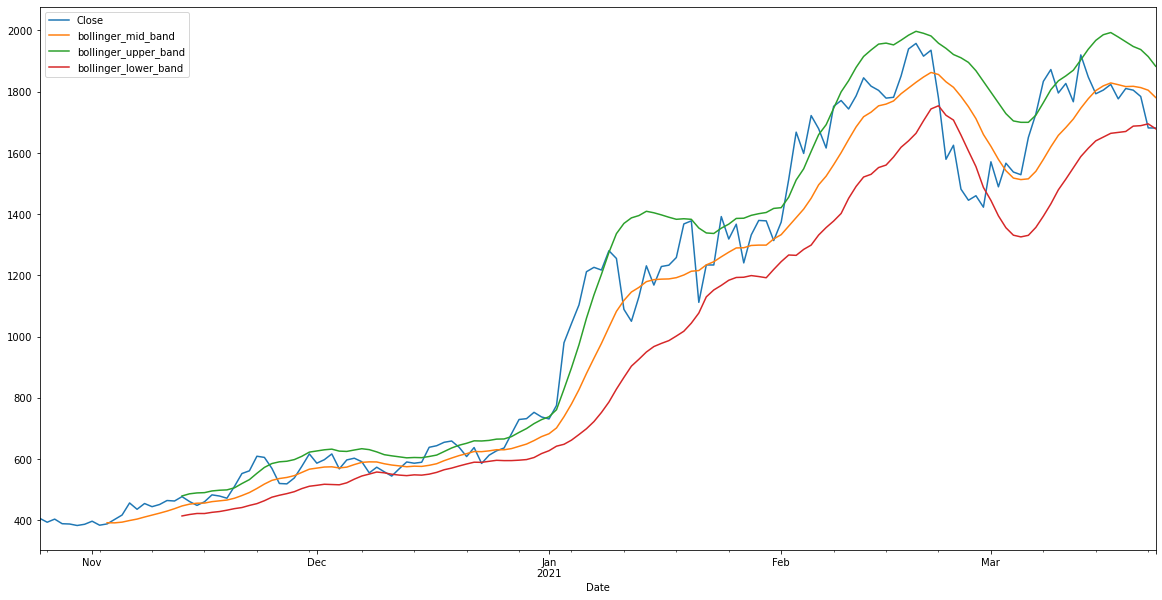

In [20]:
# Plot the Bollinger Bands for BTC/USD closing prices
df_kraken[['Close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))

In [21]:
# Define RSI indicator
df_kraken['RSI'] = talib.RSI(df_kraken["Close"])
rsi_overbought = np.where( df_kraken['RSI'] <30, 1.0, 0.0)  #oversold would indicate buy
rsi_oversold = np.where( df_kraken['RSI'] >70, -1.0, 0.0) #overbought would indicate sell
rsi_signal = rsi_overbought + rsi_oversold
df_kraken['RSI_signal'] = rsi_signal

In [22]:
df_kraken

Open     High      Low    Close         Volume  daily_return  \
Date                                                                          
2020-10-25   412.41   417.84   403.25   406.35   27190.693068           NaN   
2020-10-26   406.22   411.31   382.80   393.48   73020.457930     -0.031672   
2020-10-27   393.48   410.48   390.52   403.65   39937.762229      0.025846   
2020-10-28   403.55   409.18   381.10   388.63   53447.351942     -0.037210   
2020-10-29   388.91   394.11   380.69   387.67   53507.559151     -0.002470   
2020-10-30   387.39   392.00   373.52   382.83   58405.634138     -0.012485   
2020-10-31   383.07   393.76   380.77   386.81   26877.050217      0.010396   
2020-11-01   386.62   397.47   385.07   396.80   25999.382771      0.025827   
2020-11-02   396.80   404.56   378.16   383.78   79339.279784     -0.032813   
2020-11-03   383.43   390.41   371.00   388.01   50087.133377      0.011022   
2020-11-04   388.00   408.70   377.01   402.68   81685.228242      0.037808   
2020-11-05   402.88   421.64   396.50   417.04   93752.260267      0.035661   
2020-11-06   417.04   458.70   415.52   456.43  131858.296671      0.094451   
2020-11-07   456.58   468.83   425.00   435.81  128871.460187     -0.045177   
2020-11-08   435.67   460.89   432.67   454.60   55142.278842      0.043115   
2020-11-09   454.47   459.63   434.63   444.33   88681.718452     -0.022591   
2020-11-10   444.69   455.16   439.00   451.35   56256.840525      0.015799   
2020-11-11   451.59   476.57   450.02   464.39   80321.707565      0.028891   
2020-11-12   463.69   470.00   451.10   462.86   66834.944276     -0.003295   
2020-11-13   463.11   478.48   458.00   477.06   75582.037939      0.030679   
2020-11-14   477.26   477.98   451.95   461.18   45791.825793     -0.033287   
2020-11-15   461.38   463.14   440.44   448.49   46902.428865     -0.027516   
2020-11-16   448.22   466.00   445.95   460.30   52599.716938      0.026333   
2020-11-17   460.73   484.90   460.29   482.89   90310.069645      0.049077   
2020-11-18   482.79   495.40   454.56   479.11  141538.266273     -0.007828   
2020-11-19   479.26   481.99   465.20   471.97   48357.176134     -0.014903   
2020-11-20   472.05   514.77   471.50   510.38  108562.062456      0.081382   
2020-11-21   510.37   553.50   502.72   552.55  102160.708233      0.082625   
2020-11-22   552.57   581.82   512.00   561.48  130655.991165      0.016161   
2020-11-23   560.88   611.58   550.62   609.09  152818.240889      0.084794   
...             ...      ...      ...      ...            ...           ...   
2021-02-22  1935.44  1937.67   700.00  1778.82  232472.071048     -0.080922   
2021-02-23  1778.93  1782.81  1358.00  1579.16  311472.082420     -0.112243   
2021-02-24  1579.00  1716.00  1498.44  1625.01  157749.782482      0.029034   
2021-02-25  1625.55  1671.90  1458.76  1481.68  103915.865993     -0.088203   
2021-02-26  1480.82  1563.16  1401.00  1445.33  137274.392317     -0.024533   
2021-02-27  1445.23  1526.98  1426.52  1460.13   89749.061681      0.010240   
2021-02-28  1460.00  1469.27  1295.00  1422.70  173849.726075     -0.025635   
2021-03-01  1422.47  1573.83  1414.00  1570.99  104778.769644      0.104231   
2021-03-02  1571.00  1616.17  1455.80  1489.22  127169.204963     -0.052050   
2021-03-03  1488.56  1656.30  1478.04  1566.41   99872.152123      0.051833   
2021-03-04  1567.90  1624.68  1505.69  1537.52   90708.829044     -0.018443   
2021-03-05  1539.76  1549.42  1442.86  1528.76  109879.003457     -0.005697   
2021-03-06  1529.07  1671.10  1513.53  1650.56   72729.445954      0.079672   
2021-03-07  1651.08  1734.78  1631.19  1727.49   64850.560202      0.046608   
2021-03-08  1726.83  1842.92  1650.00  1833.68   94445.584769      0.061471   
2021-03-09  1834.19  1872.34  1796.34  1872.34   72160.271797      0.021083   
2021-03-10  1872.33  1879.37  1758.12  1795.79   82155.323534     -0.040885   
2021-03-11  1795.44  1847.73  1724.65  1826.87   71185.384072    

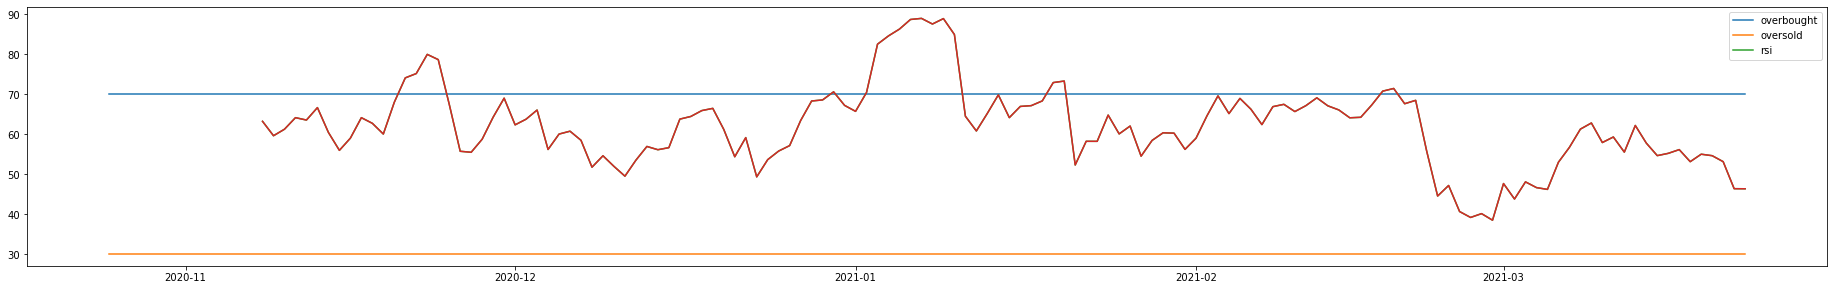

In [23]:
fig = plt.figure()
fig.set_size_inches((25, 18))
ax_rsi = fig.add_axes((0, 0.24, 1, 0.2))
ax_rsi.plot(df_kraken.index, [70] * len(df_kraken.index), label="overbought")
ax_rsi.plot(df_kraken.index, [30] * len(df_kraken.index), label="oversold")
ax_rsi.plot(df_kraken.index, df_kraken['RSI'], label="rsi")
ax_rsi.plot(df_kraken["RSI"])
ax_rsi.legend()

In [24]:
# Set x variable list of features
x_var_list = ['crossover_signal', 'vol_trend_signal', 'bollinger_signal', 'RSI_signal']
df_kraken[x_var_list] = df_kraken[x_var_list].shift(1)
df_kraken[x_var_list].tail()

crossover_signal  vol_trend_signal  bollinger_signal  RSI_signal
Date                                                                        
2021-03-19               1.0               1.0               0.0         0.0
2021-03-20               1.0               1.0               0.0         0.0
2021-03-21               1.0               1.0               0.0         0.0
2021-03-22               1.0               1.0               0.0         0.0
2021-03-23               1.0               1.0               1.0         0.0

In [25]:
# Drop NAs and replace positive/negative infinity values
df_kraken.dropna(inplace=True)
df_kraken.dropna(subset=['daily_return'], inplace=True)
df_kraken = df_kraken.replace([np.inf, -np.inf], np.nan)

#populate Positive Return based on Daily Return
df_kraken['Positive Return'] = np.where(df_kraken['daily_return'] > 0, 1.0, 0.0)

In [26]:
# Construct training start and end dates
training_start = df_kraken.index.min().strftime(format= '%Y-%m-%d')
training_end = '2020-08-20'

# Construct testing start and end dates
testing_start =  '2020-08-21'
testing_end = df_kraken.index.max().strftime(format= '%Y-%m-%d')

# Construct the X_train and y_train datasets
X_train = df_kraken[x_var_list][training_start:training_end]
y_train = df_kraken['Positive Return'][training_start:training_end]

# Construct the X test and y test datasets
X_test = df_kraken[x_var_list][testing_start:testing_end]
y_test = df_kraken['Positive Return'][testing_start:testing_end]

In [27]:
df_kraken.to_csv('kraken_pull_EthExample_03232021.csv')

In [28]:
# Load DataFrame for Dashboard
df_dashboard = df_kraken

## EZ Coin Dashboard

In [33]:
#Import Libriaries
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output

# Load PNG Images files

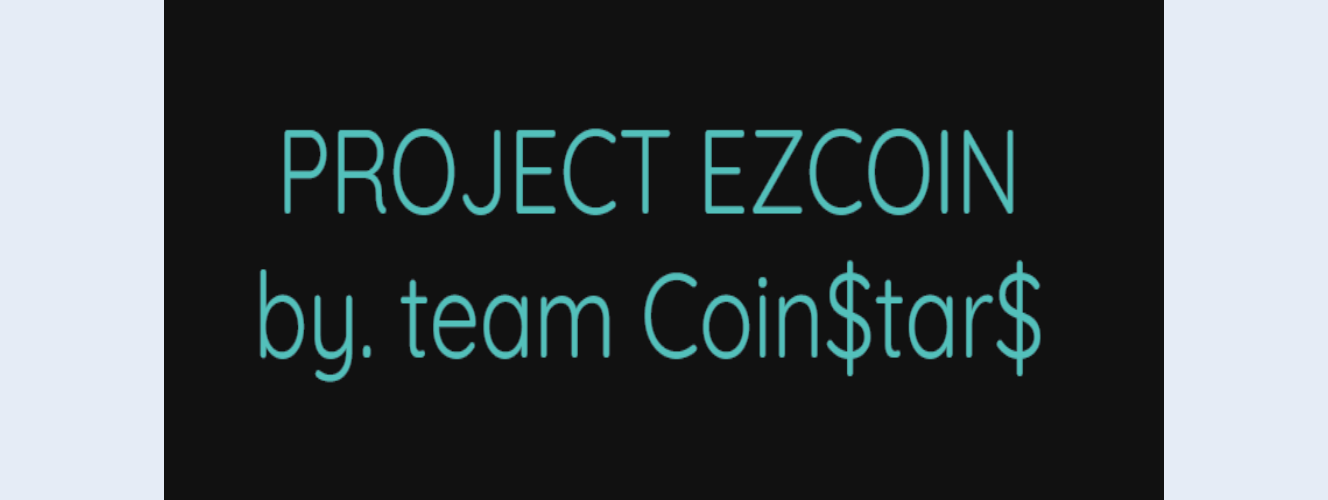

In [39]:
#Load image header for dashboard
from PIL import Image; 
img = Image.open('Images/EZCoinBlack.png')

# Create figure
figimg = go.Figure()

# Constants
img_width = 2000
img_height = 1000
scale_factor = 0.5

# Add invisible scatter trace.
# This trace is added to help the autoresize logic work.
figimg.add_trace(
    go.Scatter(
        x=[0, img_width * scale_factor],
        y=[0, img_height * scale_factor],
        mode="markers",
        marker_opacity=0
    )
)

# Configure axes
figimg.update_xaxes(
    visible=False,
    range=[0, img_width * scale_factor]
)

figimg.update_yaxes(
    visible=False,
    range=[0, img_height * scale_factor],
    # the scaleanchor attribute ensures that the aspect ratio stays constant
    scaleanchor="x"
)

# Add image
figimg.add_layout_image(
    dict(
        x=0,
        sizex=img_width * scale_factor,
        y=img_height * scale_factor,
        sizey=img_height * scale_factor,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source=img)
)

# Configure other layout
figimg.update_layout(
    width=img_width * scale_factor,
    height=img_height * scale_factor,
    margin={"l": 0, "r": 0, "t": 0, "b": 0},
)

# Disable the autosize on double click because it adds unwanted margins around the image
figimg.show(config={'doubleClick': 'reset'})

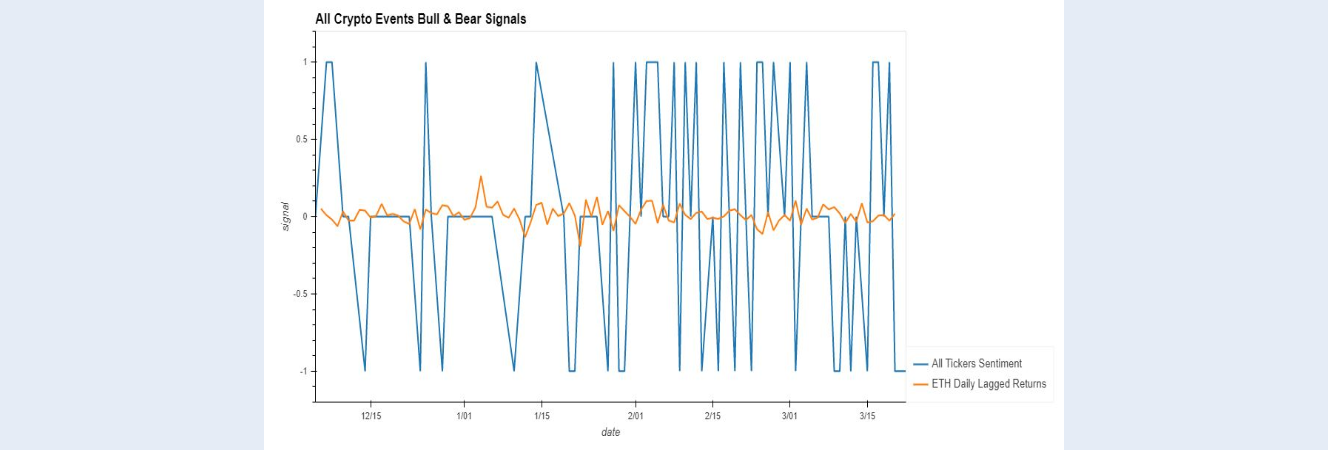

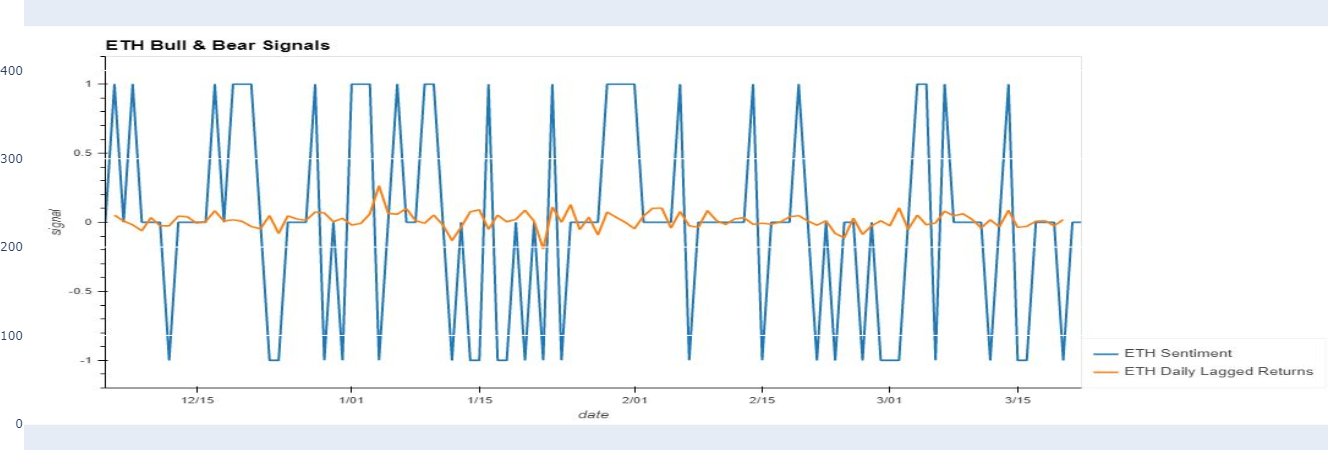

In [57]:
#Load confusion matrix png files for dashboard
img_ates = Image.open('../Max/images/all_ticker_events_signals.png')
img_eths = Image.open('../Max/images/ETH_signals.png')

# Create figure for Random Forest Confusion Matrix
figimg_ates = go.Figure()

# Constants
img_width = 1600
img_height = 900
scale_factor = 0.5

# Add invisible scatter trace.
# This trace is added to help the autoresize logic work.
figimg_ates.add_trace(
    go.Scatter(
        x=[0, img_width * scale_factor],
        y=[0, img_height * scale_factor],
        mode="markers",
        marker_opacity=0
    )
)

# Configure axes
figimg_ates.update_xaxes(
    visible=False,
    range=[0, img_width * scale_factor]
)

figimg_ates.update_yaxes(
    visible=False,
    range=[0, img_height * scale_factor],
    # the scaleanchor attribute ensures that the aspect ratio stays constant
    scaleanchor="x"
)

# Add image
figimg_ates.add_layout_image(
    dict(
        x=0,
        sizex=img_width * scale_factor,
        y=img_height * scale_factor,
        sizey=img_height * scale_factor,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source=img_ates)
)

# Configure other layout
figimg_ates.update_layout(
    width=img_width * scale_factor,
    height=img_height * scale_factor,
    margin={"l": 0, "r": 0, "t": 0, "b": 0},
)

# Create figure for AdaBoost Confusion Matrix
figimg_eths = go.Figure()


# Add invisible scatter trace.
# This trace is added to help the autoresize logic work.
figimg_eths.add_trace(
    go.Scatter(
        x=[0, img_width * scale_factor],
        y=[0, img_height * scale_factor],
        mode="markers",
        marker_opacity=0
    )
)

# Configure axes
figimg_eths.update_xaxes(
    visible=False,
    range=[0, img_width * scale_factor]
)

figimg_ates.update_yaxes(
    visible=False,
    range=[0, img_height * scale_factor],
    # the scaleanchor attribute ensures that the aspect ratio stays constant
    scaleanchor="x"
)

# Add image
figimg_eths.add_layout_image(
    dict(
        x=0,
        sizex=img_width * scale_factor,
        y=img_height * scale_factor,
        sizey=img_height * scale_factor,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source=img_eths)
)

# Configure other layout
figimg_eths.update_layout(
    width=img_width * scale_factor,
    height=img_height * scale_factor,
    margin={"l": 0, "r": 0, "t": 0, "b": 0},
)

figimg_ates.show(config={'doubleClick': 'reset'})
figimg_eths.show(config={'doubleClick': 'reset'})

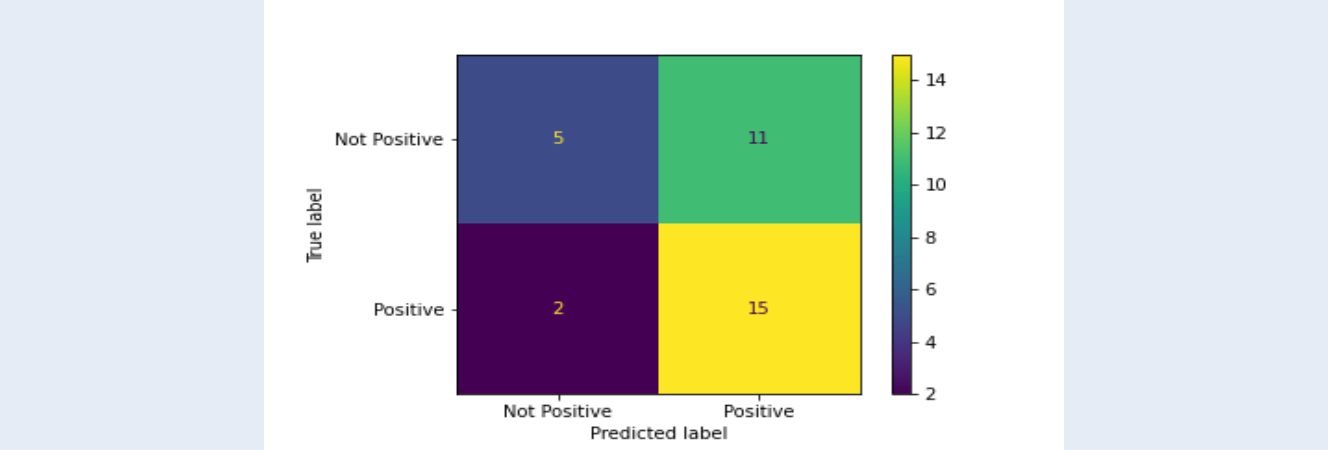

In [52]:
#Load confusion matrix png files for dashboard
img_rfcm = Image.open('../Monique/Images/RF_confusion_matrix.png')
img_abcm = Image.open('../Monique/Images/AB_confusion_matrix.png')

# Create figure for Random Forest Confusion Matrix
figimg_rfcm = go.Figure()

# Constants
img_width = 1600
img_height = 900
scale_factor = 0.5

# Add invisible scatter trace.
# This trace is added to help the autoresize logic work.
figimg_rfcm.add_trace(
    go.Scatter(
        x=[0, img_width * scale_factor],
        y=[0, img_height * scale_factor],
        mode="markers",
        marker_opacity=0
    )
)

# Configure axes
figimg_rfcm.update_xaxes(
    visible=False,
    range=[0, img_width * scale_factor]
)

figimg_rfcm.update_yaxes(
    visible=False,
    range=[0, img_height * scale_factor],
    # the scaleanchor attribute ensures that the aspect ratio stays constant
    scaleanchor="x"
)

# Add image
figimg_rfcm.add_layout_image(
    dict(
        x=0,
        sizex=img_width * scale_factor,
        y=img_height * scale_factor,
        sizey=img_height * scale_factor,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source=img_rfcm)
)

# Configure other layout
figimg_rfcm.update_layout(
    width=img_width * scale_factor,
    height=img_height * scale_factor,
    margin={"l": 0, "r": 0, "t": 0, "b": 0},
)

# Create figure for AdaBoost Confusion Matrix
figimg_abcm = go.Figure()


# Add invisible scatter trace.
# This trace is added to help the autoresize logic work.
figimg_abcm.add_trace(
    go.Scatter(
        x=[0, img_width * scale_factor],
        y=[0, img_height * scale_factor],
        mode="markers",
        marker_opacity=0
    )
)

# Configure axes
figimg_abcm.update_xaxes(
    visible=False,
    range=[0, img_width * scale_factor]
)

figimg_abcm.update_yaxes(
    visible=False,
    range=[0, img_height * scale_factor],
    # the scaleanchor attribute ensures that the aspect ratio stays constant
    scaleanchor="x"
)

# Add image
figimg_abcm.add_layout_image(
    dict(
        x=0,
        sizex=img_width * scale_factor,
        y=img_height * scale_factor,
        sizey=img_height * scale_factor,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source=img_abcm)
)

# Configure other layout
figimg_abcm.update_layout(
    width=img_width * scale_factor,
    height=img_height * scale_factor,
    margin={"l": 0, "r": 0, "t": 0, "b": 0},
)

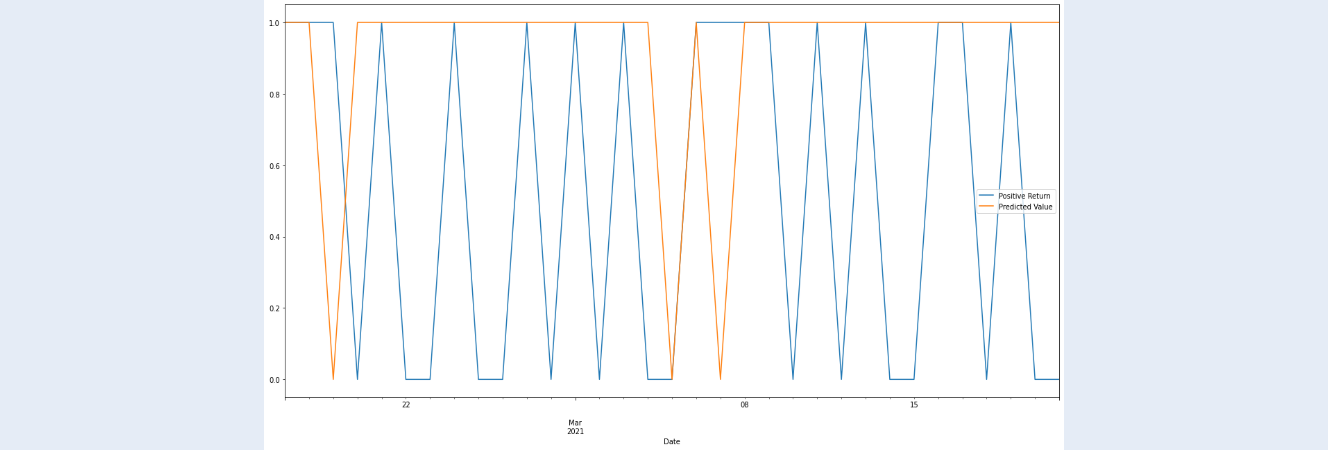

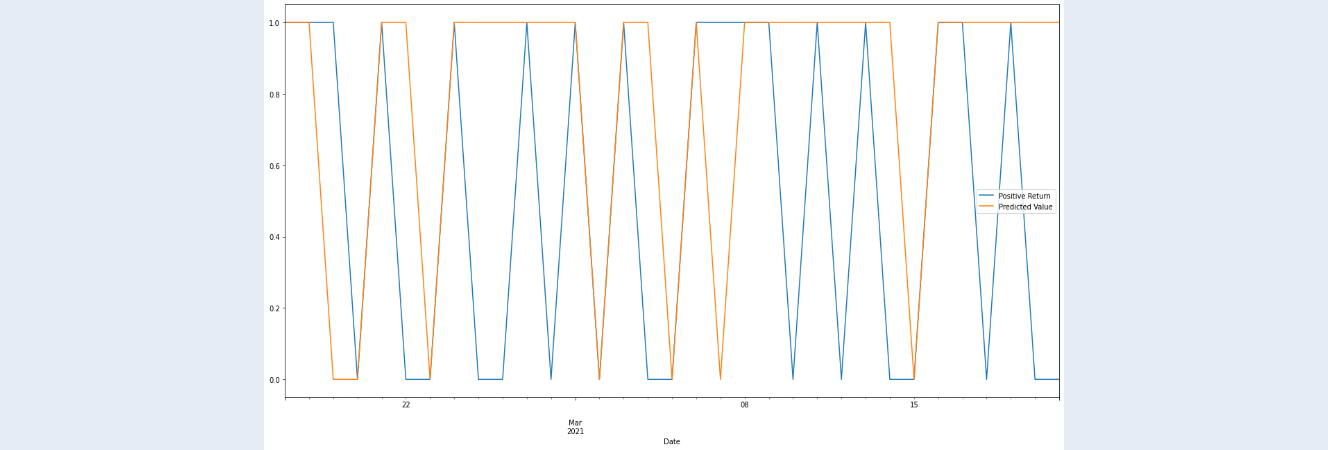

In [42]:
#Load Model Results png files for dashboard
img_rf = Image.open('../Monique/Images/RF_results_combined.png')
img_ab = Image.open('../Monique/Images/AB_results_combined.png')

# Create figure for Random Forest results
figimg_rf = go.Figure()

# Constants
img_width = 1600
img_height = 900
scale_factor = 0.5

# Add invisible scatter trace.
# This trace is added to help the autoresize logic work.
figimg_rf.add_trace(
    go.Scatter(
        x=[0, img_width * scale_factor],
        y=[0, img_height * scale_factor],
        mode="markers",
        marker_opacity=0
    )
)

# Configure axes
figimg_rf.update_xaxes(
    visible=False,
    range=[0, img_width * scale_factor]
)

figimg_rf.update_yaxes(
    visible=False,
    range=[0, img_height * scale_factor],
    # the scaleanchor attribute ensures that the aspect ratio stays constant
    scaleanchor="x"
)

# Add image
figimg_rf.add_layout_image(
    dict(
        x=0,
        sizex=img_width * scale_factor,
        y=img_height * scale_factor,
        sizey=img_height * scale_factor,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source=img_rf)
)

# Configure other layout
figimg_rf.update_layout(
    width=img_width * scale_factor,
    height=img_height * scale_factor,
    margin={"l": 0, "r": 0, "t": 0, "b": 0},
)

# Create figure for AdaBoost results
figimg_ab = go.Figure()


# Add invisible scatter trace.
# This trace is added to help the autoresize logic work.
figimg_ab.add_trace(
    go.Scatter(
        x=[0, img_width * scale_factor],
        y=[0, img_height * scale_factor],
        mode="markers",
        marker_opacity=0
    )
)

# Configure axes
figimg_ab.update_xaxes(
    visible=False,
    range=[0, img_width * scale_factor]
)

figimg_ab.update_yaxes(
    visible=False,
    range=[0, img_height * scale_factor],
    # the scaleanchor attribute ensures that the aspect ratio stays constant
    scaleanchor="x"
)

# Add image
figimg_ab.add_layout_image(
    dict(
        x=0,
        sizex=img_width * scale_factor,
        y=img_height * scale_factor,
        sizey=img_height * scale_factor,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source=img_ab)
)

# Configure other layout
figimg_ab.update_layout(
    width=img_width * scale_factor,
    height=img_height * scale_factor,
    margin={"l": 0, "r": 0, "t": 0, "b": 0},
)

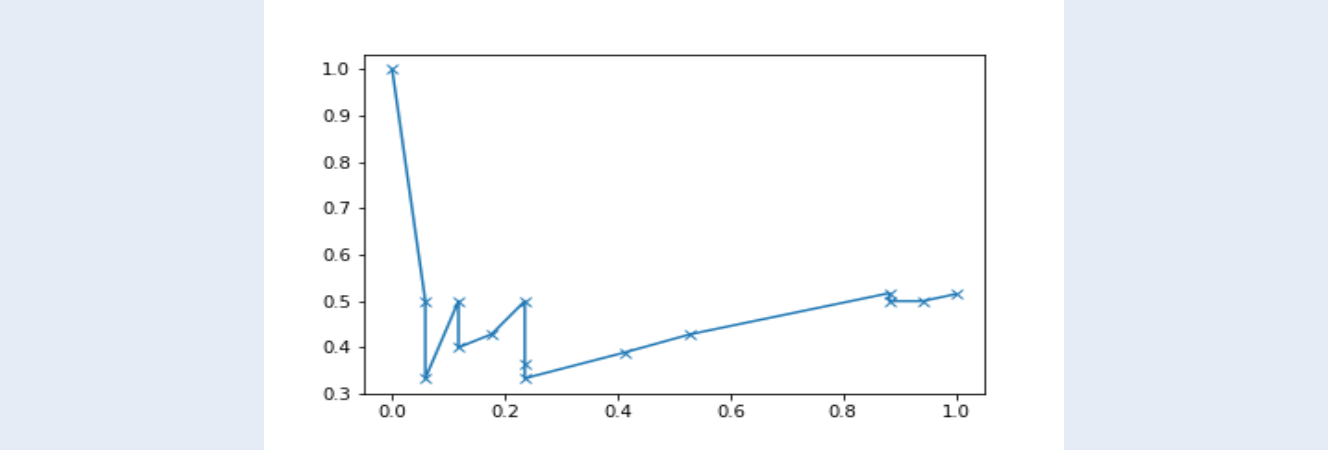

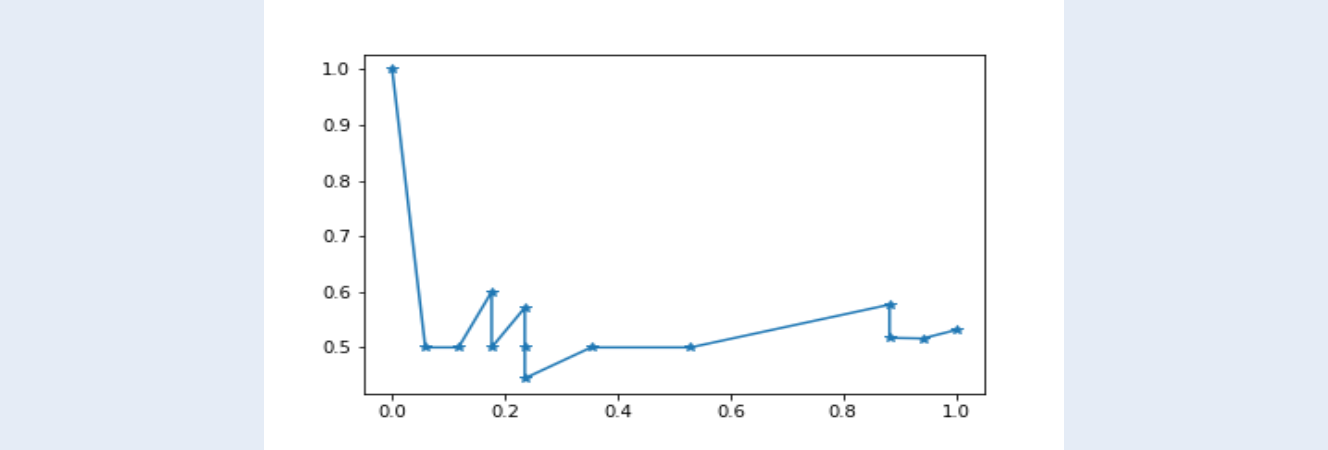

In [43]:
#Load Model PR Curves
img_rfcurve = Image.open('../Monique/Images/RF_PR_Curve.png')
img_abcurve = Image.open('../Monique/Images/AB_PR_Curve.png')

# Create figure for Random Forest results
figimg_rfcurve = go.Figure()

# Constants
img_width = 1600
img_height = 900
scale_factor = 0.5

# Add invisible scatter trace.
# This trace is added to help the autoresize logic work.
figimg_rfcurve.add_trace(
    go.Scatter(
        x=[0, img_width * scale_factor],
        y=[0, img_height * scale_factor],
        mode="markers",
        marker_opacity=0
    )
)

# Configure axes
figimg_rfcurve.update_xaxes(
    visible=False,
    range=[0, img_width * scale_factor]
)

figimg_rfcurve.update_yaxes(
    visible=False,
    range=[0, img_height * scale_factor],
    # the scaleanchor attribute ensures that the aspect ratio stays constant
    scaleanchor="x"
)

# Add image
figimg_rfcurve.add_layout_image(
    dict(
        x=0,
        sizex=img_width * scale_factor,
        y=img_height * scale_factor,
        sizey=img_height * scale_factor,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source=img_rfcurve)
)

# Configure other layout
figimg_rfcurve.update_layout(
    width=img_width * scale_factor,
    height=img_height * scale_factor,
    margin={"l": 0, "r": 0, "t": 0, "b": 0},
)

# Create figure for AdaBoost results
figimg_abcurve = go.Figure()


# Add invisible scatter trace.
# This trace is added to help the autoresize logic work.
figimg_abcurve.add_trace(
    go.Scatter(
        x=[0, img_width * scale_factor],
        y=[0, img_height * scale_factor],
        mode="markers",
        marker_opacity=0
    )
)

# Configure axes
figimg_abcurve.update_xaxes(
    visible=False,
    range=[0, img_width * scale_factor]
)

figimg_abcurve.update_yaxes(
    visible=False,
    range=[0, img_height * scale_factor],
    # the scaleanchor attribute ensures that the aspect ratio stays constant
    scaleanchor="x"
)

# Add image
figimg_abcurve.add_layout_image(
    dict(
        x=0,
        sizex=img_width * scale_factor,
        y=img_height * scale_factor,
        sizey=img_height * scale_factor,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source=img_abcurve)
)

# Configure other layout
figimg_abcurve.update_layout(
    width=img_width * scale_factor,
    height=img_height * scale_factor,
    margin={"l": 0, "r": 0, "t": 0, "b": 0},
)

# Create Technical Indicator Charts

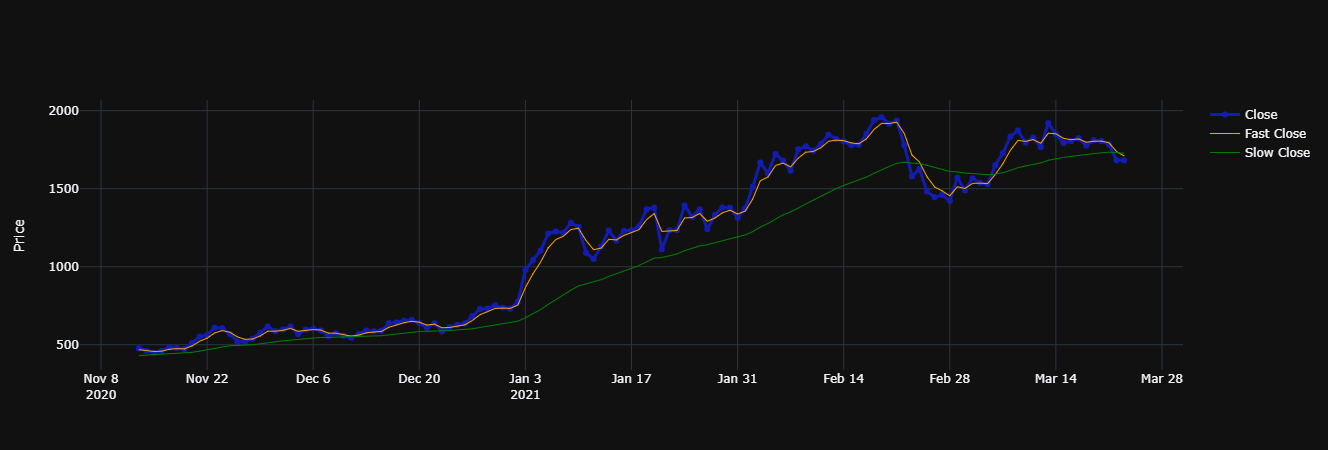

In [44]:
#EMA of ETH/USD closing prices
fig = go.Figure([
    
    go.Scatter(
        name='Close',
        x=df_dashboard.index,
        y=df_dashboard['Close'],
        mode='markers+lines',
        marker=dict(color='#121cb0'),
        line=dict(width=3),
        showlegend=True
    ),
    go.Scatter(
        name='Fast Close',
        x=df_dashboard.index,
        y=df_dashboard['fast_close'],
        mode='lines',
        marker=dict(color="Orange"),
        line=dict(width=1),
        showlegend=True
    ),
    go.Scatter(
        name='Slow Close',
        x=df_dashboard.index,
        y=df_dashboard['slow_close'],
        marker=dict(color="Green"),
        line=dict(width=1),
        mode='lines',
        showlegend=True
    )
    
])
fig.update_layout(
    yaxis_title='Price',
    #title='EMA of ETH/USD closing prices',
    template = 'plotly_dark',
    hovermode="x"
)

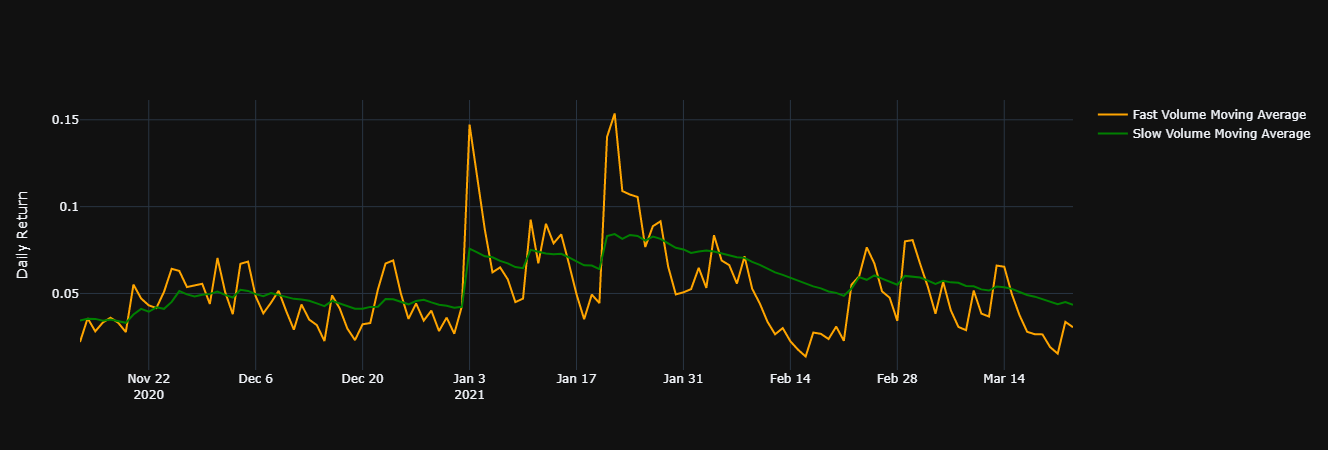

In [45]:
# Plot the EMA of BTC/USD daily return volatility
fig2 = go.Figure([
    
    go.Scatter(
        name='Fast Volume Moving Average',
        x=df_dashboard.index,
        y=df_dashboard['fast_vol'],
        mode='lines',
        marker=dict(color="Orange"),
        line=dict(width=2),
        showlegend=True
    ),
    go.Scatter(
        name='Slow Volume Moving Average',
        x=df_dashboard.index,
        y=df_dashboard['slow_vol'],
        marker=dict(color="Green"),
        line=dict(width=2),
        mode='lines',
        showlegend=True
    )
    
])
fig2.update_layout(
    yaxis_title='Daily Return',
    #title='EMA of BTC/USD daily return volatility',
    template = 'plotly_dark',
    hovermode="x"
)

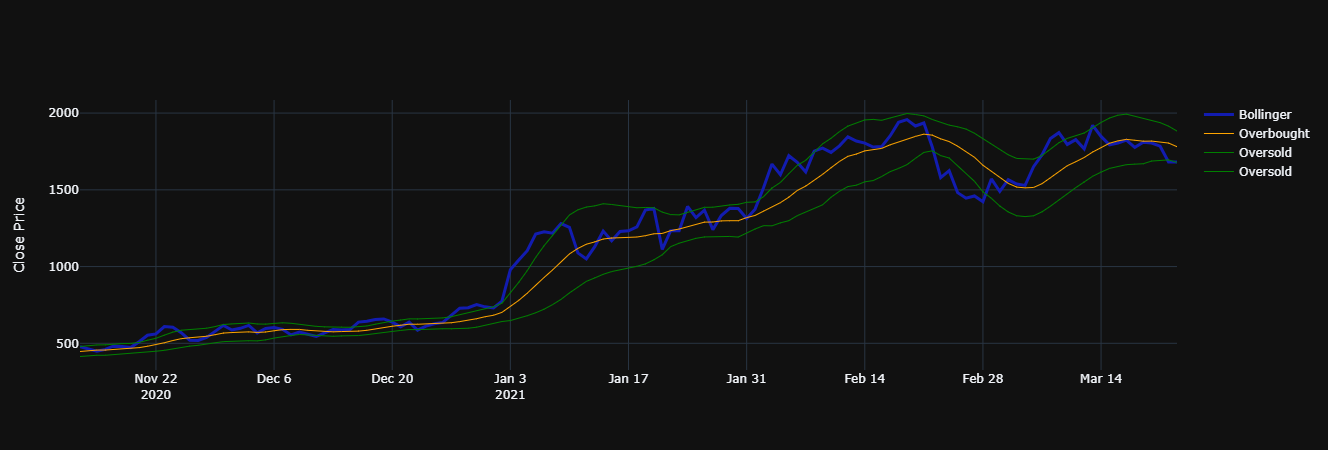

In [46]:
#Plot the Bollinger Bands for BTC/USD closing prices

fig3 = go.Figure([
                  
  go.Scatter(
        name='Bollinger',
        x=df_dashboard.index,
        y=df_dashboard['Close'],
        mode='lines',
        marker=dict(color="#121cb0"),
        line=dict(width=3),
        showlegend=True    
    ),

    go.Scatter(
        name='Overbought',
        x=df_dashboard.index,
        y=df_dashboard['bollinger_mid_band'],
        marker=dict(color="Orange"),
        line=dict(width=1),
        mode='lines',
        showlegend=True
    ), 

    go.Scatter(
        name='Oversold',
        x=df_dashboard.index,
        y=df_dashboard['bollinger_upper_band'],
        marker=dict(color="Green"),
        line=dict(width=1),
        mode='lines',
        showlegend=True
    ), 

    go.Scatter(
        name='Oversold',
        x=df_dashboard.index,
        y=df_dashboard['bollinger_lower_band'],
        marker=dict(color="Green"),
        line=dict(width=1),
        mode='lines',
        showlegend=True
    )      
    
             
])
fig3.update_layout(
    yaxis_title='Close Price',
    #title='Bollinger Bands',
    template = 'plotly_dark',
    hovermode="x"
)

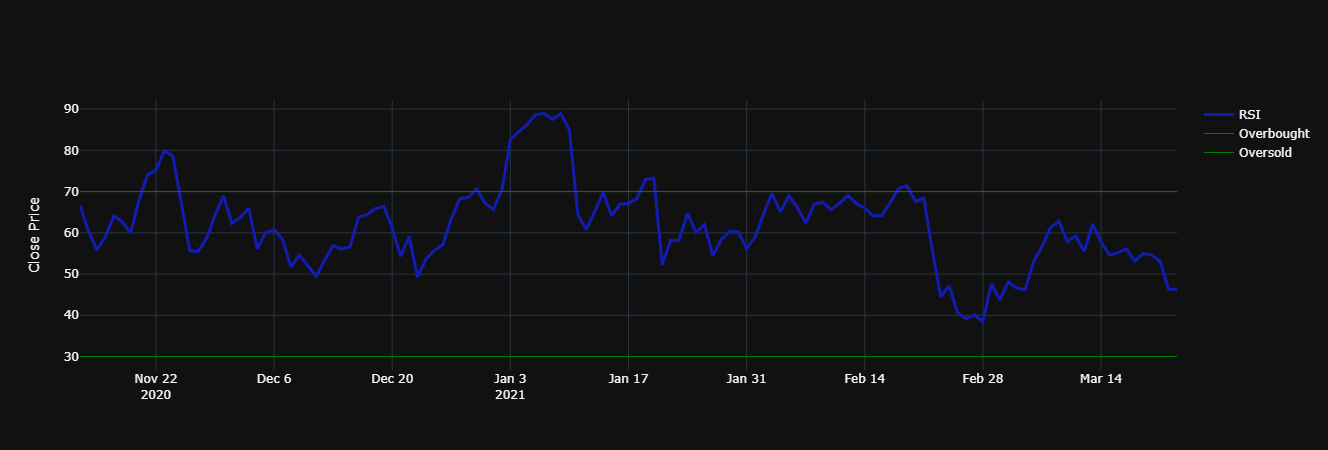

In [47]:
#RSI
fig4 = go.Figure([
                  
  go.Scatter(
        name='RSI',
        x=df_dashboard.index,
        y=df_dashboard['RSI'],
        mode='lines',
        marker=dict(color="#121cb0"),
        line=dict(width=3),
        showlegend=True    
    ),

    go.Scatter(
        name='Overbought',
        x=df_dashboard.index,
        y=[70] * len(df_dashboard.index),
        marker=dict(color="Green"),
        line=dict(width=1),
        mode='lines',
        showlegend=True
    ), 

    go.Scatter(
        name='Oversold',
        x=df_dashboard.index,
        y=[30] * len(df_dashboard.index),
        marker=dict(color="Green"),
        line=dict(width=1),
        mode='lines',
        showlegend=True
    )            
])
fig4.update_layout(
    yaxis_title='Close Price',
    #title='RSI',
    template = 'plotly_dark',
    hovermode="x"
)

# Plotly Dash

In [58]:
# Build Dash App
app = JupyterDash(__name__)

colors = {
    'background': '#111111',
    'text': '#7FDBFF'   
}

app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
                                
    #image
    html.Div(children=[
        dcc.Graph(figure=figimg)
    ], style={'margin-left': '25%'}
    ), 
    #krakken data chart
    html.Div(style={'width':'75%', 'textAlign': 'left', 'color': colors['text']}, children=[
    html.H1("Dash"),
    dcc.Graph(id='line-chart'),
    html.Label([
        "Input Variable",
        dcc.Dropdown(
            id='Close', clearable=False,
            value=df_dashboard.columns[0], options=[
                {'label': a, 'value': a}
                for a in df_dashboard.columns
            ])
    ]),
]),

html.Div(style={'width':'75%', 'textAlign': 'left', 'color': colors['text']}, children=[
    html.H1("Plot the EMA of ETH closing prices"),
    # Plot the Bollinger Bands for BTC/USD closing prices
    dcc.Graph(figure=fig)
]), 

html.Div(style={'width':'75%', 'textAlign': 'left', 'color': colors['text']}, children=[
    html.H1("Plot the EMA of ETH closing prices"),
    # Plot the Bollinger Bands for BTC/USD closing prices
    dcc.Graph(figure=fig2)
]),

html.Div(style={'width':'75%', 'textAlign': 'left', 'color': colors['text']}, children=[
    html.H1("Plot the EMA of ETH closing prices"),
    # Plot the Bollinger Bands for BTC/USD closing prices
    dcc.Graph(figure=fig3)
]),

html.Div(style={'width':'75%', 'textAlign': 'left', 'color': colors['text']}, children=[
    html.H1("RSI - Relative Strength Indicator"),
    # Plot the Bollinger Bands for BTC/USD closing prices
    dcc.Graph(figure=fig4)
]),

#Model Results
html.Div(children=[
    html.Div((
        html.H1("All Ticker Events Signals"),
        dcc.Graph(figure=figimg_ates)
        ), style={'display': 'inline-block', 'padding': '25px'}),
    html.Div((
        html.H1("Ethereum Signals"),
        dcc.Graph(figure=figimg_eths)
        ), style={'display': 'inline-block', 'padding': '25px'}),
], style={'width': '100%', 'display': 'inline-block', 'color': colors['text'] }
),
    
#confusion Matrix
html.Div(children=[
    html.Div((
        html.H1("Confusion Matrix Random Forest"),
        dcc.Graph(figure=figimg_rfcm)
        ), style={'display': 'inline-block', 'padding': '25px'}),
    html.Div((
        html.H1("Confusion Matrix AdaBoost"),
        dcc.Graph(figure=figimg_abcm)
        ), style={'display': 'inline-block', 'padding': '25px'}),
], style={'width': '100%', 'display': 'inline-block', 'color': colors['text'] }
),
    
#Model Results
html.Div(children=[
    html.Div((
        html.H1("Results Random Forest"),
        dcc.Graph(figure=figimg_rf)
        ), style={'display': 'inline-block', 'padding': '25px'}),
    html.Div((
        html.H1("Results AdaBoost"),
        dcc.Graph(figure=figimg_ab)
        ), style={'display': 'inline-block', 'padding': '25px'}),
], style={'width': '100%', 'display': 'inline-block', 'color': colors['text'] }
),

#Model PR Curve
html.Div(children=[
    html.Div((
        html.H1("Results Random Forest"),
        dcc.Graph(figure=figimg_rfcurve)
        ), style={'display': 'inline-block', 'padding': '25px'}),
    html.Div((
        html.H1("Results AdaBoost"),
        dcc.Graph(figure=figimg_abcurve)
        ), style={'display': 'inline-block', 'padding': '25px'}),
], style={'width': '100%', 'display': 'inline-block', 'color': colors['text'] }
)

])
# Define callback to update interactive graph
@app.callback(
    Output('line-chart', 'figure'),
    [Input('Close', "value")]
)
def update_figure(columns):
    return px.line(
        df_dashboard, x=df_dashboard.index, y=columns, template = "plotly_dark",
        render_mode="webgl")

# Run app and display result inline in the notebook
#app.run_server(mode='inline')
app.run_server(mode='external')

Dash app running on http://127.0.0.1:8050/
